In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='Species', ylabel='PetalWidthCm'>

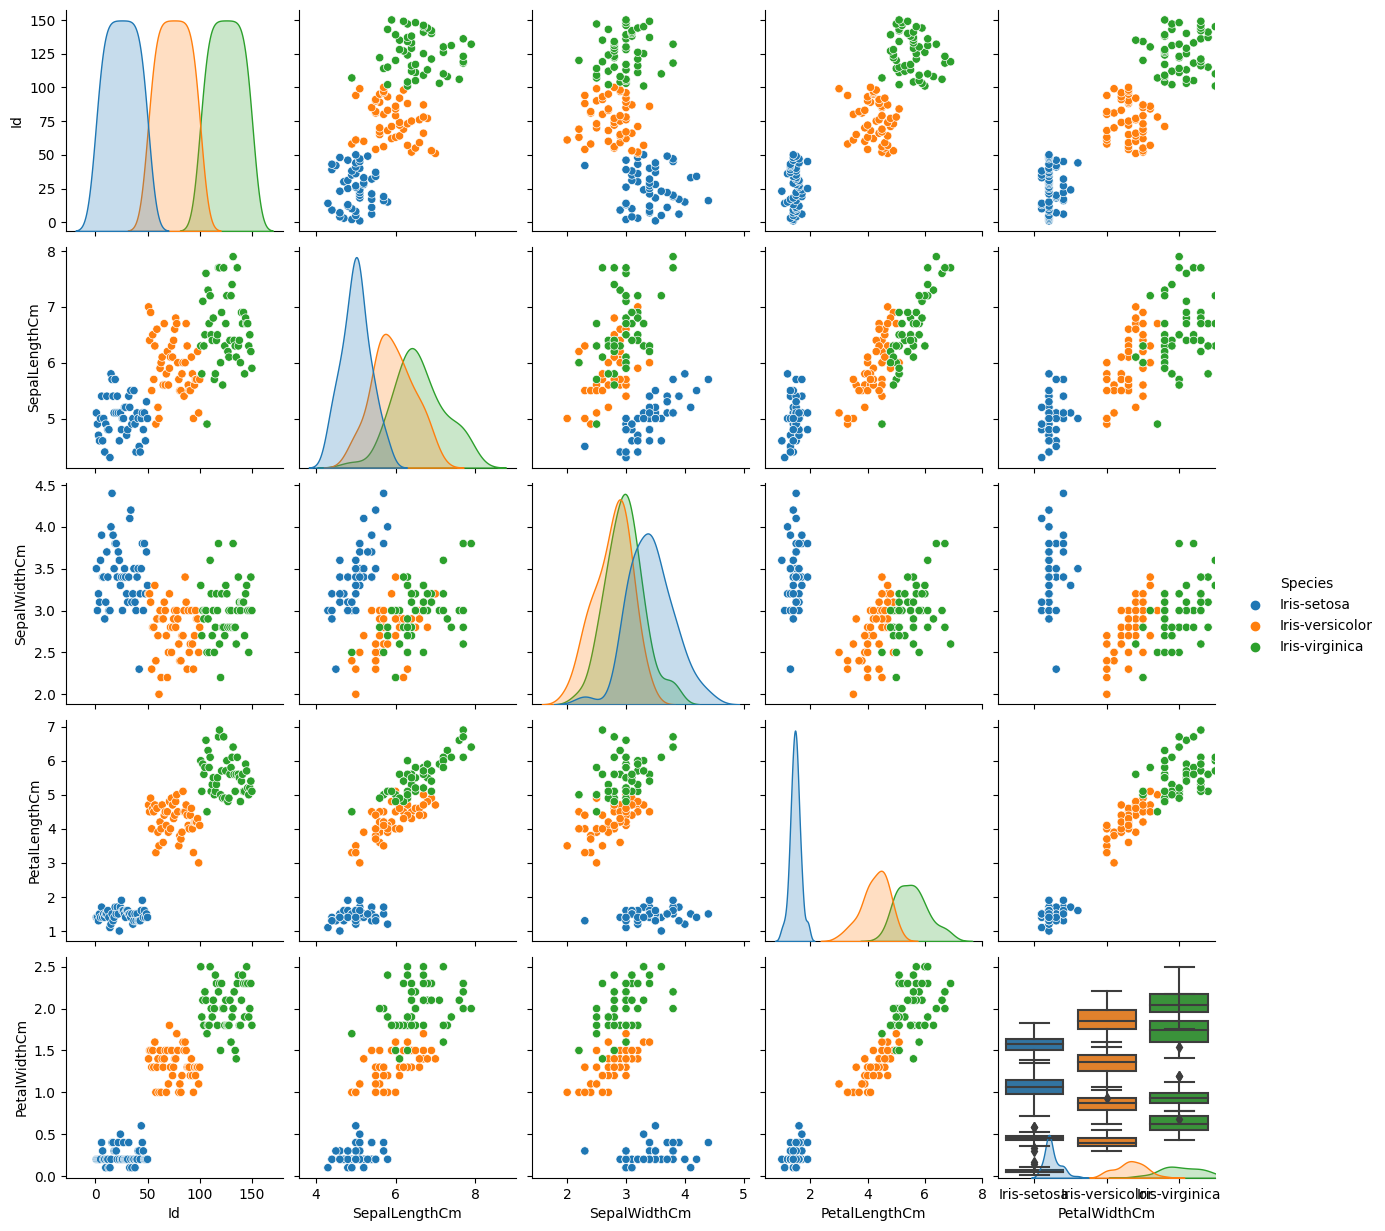

In [3]:
# Análise Exploratória de Dados (EDA)
sns.pairplot(data, hue="Species")
sns.boxplot(x="Species", y="SepalLengthCm", data=data)
sns.boxplot(x="Species", y="SepalWidthCm", data=data)
sns.boxplot(x="Species", y="PetalLengthCm", data=data)
sns.boxplot(x="Species", y="PetalWidthCm", data=data)

In [4]:
# Balanceamento das classes
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(data.drop(['Id', 'Species'], axis=1), data['Species'])
data = pd.concat([X_resampled, y_resampled], axis=1)

In [5]:
# Dividindo os dados em conjunto de treinamento e teste
X = data.drop(['Species'], axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [6]:
# Treinando o modelo de Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
# Avaliando o modelo
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0]
 [ 0 10  0]
 [ 0  0  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

